In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    name='NanumGothic'
)
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({"font.size" : 10, 
                     "font.family" : 'NanumGothic',
                     "axes.unicode_minus" : False})
plt.rc("font", family = 'NanumGothic')
import seaborn as sns
from pathlib import Path

In [2]:
DATA = Path("../../data")

In [3]:
train = pd.read_csv(DATA / "fog_train_knn-imputate_robust.csv")
test = pd.read_csv(DATA / "fog_test_knn-imputate_robust.csv")

In [4]:
train

,년월일시분,년도,월,일,시간,분,지점번호,지점번호1,지점번호2,NaN유무,시정구간,10분평균풍향,10분평균풍속,10분평균기온,강수유무,10분평균상대습도,10분일사량합,10분평균지면온도,10분평균시정
0,2020-01-01 00:10:00,I,1,1,0,10,AA,A,A,0,4,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000.0
1,2020-01-01 00:20:00,I,1,1,0,20,AA,A,A,0,4,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000.0
2,2020-01-01 00:30:00,I,1,1,0,30,AA,A,A,0,4,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000.0
3,2020-01-01 00:40:00,I,1,1,0,40,AA,A,A,0,4,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000.0
4,2020-01-01 00:50:00,I,1,1,0,50,AA,A,A,0,4,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156454,2022-12-31 23:10:00,K,12,31,23,10,EC,E,C,0,4,305.3,7.7,2.5,0.0,50.2,0.0,-0.9,20000.0
3156455,2022-12-31 23:20:00,K,12,31,23,20,EC,E,C,0,4,293.8,5.7,2.3,0.0,50.1,0.0,-1.3,20000.0
3156456,2022-12-31 23:30:00,K,12,31,23,30,EC,E,C,0,4,274.2,4.9,2.2,0.0,51.0,0.0,-1.4,20000.0
3156457,2022-12-31 23:40:00,K,12,31,23,40,EC,E,C,0,4,270.3,4.6,2.1,0.0,51.7,0.0,-1.6,20000.0


In [5]:
test

,년월일시분,년도,월,일,시간,분,지점번호,지점번호1,지점번호2,NaN유무,시정구간,10분평균풍향,10분평균풍속,10분평균기온,강수유무,10분평균상대습도,10분일사량합,10분평균지면온도
0,2024-01-01 00:00:00,L,1,1,0,0,AI,A,I,1,NaN,329.5,0.6,-2.5,0.0,87.5,0.0,-1.6
1,2024-01-01 00:10:00,L,1,1,0,10,AI,A,I,1,NaN,321.8,1.2,-2.5,0.0,88.2,0.0,-1.6
2,2024-01-01 00:20:00,L,1,1,0,20,AI,A,I,1,NaN,0.4,0.4,-2.5,0.0,88.6,0.0,-1.7
3,2024-01-01 00:30:00,L,1,1,0,30,AI,A,I,1,NaN,323.6,0.7,-2.6,0.0,88.7,0.0,-1.6
4,2024-01-01 00:40:00,L,1,1,0,40,AI,A,I,1,NaN,208.4,0.2,-2.6,0.0,89.0,0.0,-1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262795,2024-12-31 23:10:00,L,12,31,23,10,ED,E,D,1,NaN,338.8,6.1,4.5,0.0,71.3,0.0,1.9
262796,2024-12-31 23:20:00,L,12,31,23,20,ED,E,D,1,NaN,335.2,5.8,4.6,0.0,71.4,0.0,1.9
262797,2024-12-31 23:30:00,L,12,31,23,30,ED,E,D,1,NaN,337.1,5.3,4.5,0.0,72.1,0.0,1.8
262798,2024-12-31 23:40:00,L,12,31,23,40,ED,E,D,1,NaN,322.0,3.7,4.3,0.0,72.5,0.0,1.4


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

In [7]:
train_df = train.loc[:, ["년도", "10분평균풍향", "10분평균풍속", "10분평균기온", "10분평균상대습도", "10분일사량합", "10분평균지면온도", "강수유무", "시정구간"]]
test_df = test.loc[:, ["10분평균풍향", "10분평균풍속", "10분평균기온", "10분평균상대습도", "10분일사량합", "10분평균지면온도", "강수유무"]]

In [8]:
train_df

,년도,10분평균풍향,10분평균풍속,10분평균기온,10분평균상대습도,10분일사량합,10분평균지면온도,강수유무,시정구간
0,I,0.0,0.0,-6.4,38.9,0.0,-2.8,0.0,4
1,I,0.0,0.0,-6.3,37.9,0.0,-2.7,0.0,4
2,I,0.0,0.0,-6.3,40.0,0.0,-2.6,0.0,4
3,I,27.8,0.4,-6.2,39.5,0.0,-2.6,0.0,4
4,I,59.7,0.5,-6.1,39.8,0.0,-2.5,0.0,4
...,...,...,...,...,...,...,...,...,...
3156454,K,305.3,7.7,2.5,50.2,0.0,-0.9,0.0,4
3156455,K,293.8,5.7,2.3,50.1,0.0,-1.3,0.0,4
3156456,K,274.2,4.9,2.2,51.0,0.0,-1.4,0.0,4
3156457,K,270.3,4.6,2.1,51.7,0.0,-1.6,0.0,4


In [9]:
test_df

,10분평균풍향,10분평균풍속,10분평균기온,10분평균상대습도,10분일사량합,10분평균지면온도,강수유무
0,329.5,0.6,-2.5,87.5,0.0,-1.6,0.0
1,321.8,1.2,-2.5,88.2,0.0,-1.6,0.0
2,0.4,0.4,-2.5,88.6,0.0,-1.7,0.0
3,323.6,0.7,-2.6,88.7,0.0,-1.6,0.0
4,208.4,0.2,-2.6,89.0,0.0,-1.6,0.0
...,...,...,...,...,...,...,...
262795,338.8,6.1,4.5,71.3,0.0,1.9,0.0
262796,335.2,5.8,4.6,71.4,0.0,1.9,0.0
262797,337.1,5.3,4.5,72.1,0.0,1.8,0.0
262798,322.0,3.7,4.3,72.5,0.0,1.4,0.0


In [10]:
# min-max scaler
from sklearn.preprocessing import RobustScaler

X_scaler = RobustScaler()
X_cols = ["10분평균풍향", "10분평균풍속", "10분평균기온", "10분평균상대습도", "10분일사량합", "10분평균지면온도", "강수유무"]
y_cols = "시정구간"
train_df.loc[:, X_cols] = X_scaler.fit_transform(train_df[X_cols])
train_y = np.array(train_df.loc[:, y_cols]) # Class Wights 계산을 위해
test_df.loc[:, X_cols] = X_scaler.transform(test_df[X_cols])

In [11]:
train_df

,년도,10분평균풍향,10분평균풍속,10분평균기온,10분평균상대습도,10분일사량합,10분평균지면온도,강수유무,시정구간
0,I,-1.095089,-0.857143,-1.254545,-0.892216,-0.058824,-0.994709,0.0,4
1,I,-1.095089,-0.857143,-1.248485,-0.922156,-0.058824,-0.989418,0.0,4
2,I,-1.095089,-0.857143,-1.248485,-0.859281,-0.058824,-0.984127,0.0,4
3,I,-0.949843,-0.666667,-1.242424,-0.874251,-0.058824,-0.984127,0.0,4
4,I,-0.783177,-0.619048,-1.236364,-0.865269,-0.058824,-0.978836,0.0,4
...,...,...,...,...,...,...,...,...,...
3156454,K,0.500000,2.809524,-0.715152,-0.553892,-0.058824,-0.894180,0.0,4
3156455,K,0.439916,1.857143,-0.727273,-0.556886,-0.058824,-0.915344,0.0,4
3156456,K,0.337513,1.476190,-0.733333,-0.529940,-0.058824,-0.920635,0.0,4
3156457,K,0.317137,1.333333,-0.739394,-0.508982,-0.058824,-0.931217,0.0,4


In [12]:
test_df

,10분평균풍향,10분평균풍속,10분평균기온,10분평균상대습도,10분일사량합,10분평균지면온도,강수유무
0,0.626437,-0.571429,-1.018182,0.562874,-0.058824,-0.931217,0.0
1,0.586207,-0.285714,-1.018182,0.583832,-0.058824,-0.931217,0.0
2,-1.092999,-0.666667,-1.018182,0.595808,-0.058824,-0.936508,0.0
3,0.595611,-0.523810,-1.024242,0.598802,-0.058824,-0.931217,0.0
4,-0.006270,-0.761905,-1.024242,0.607784,-0.058824,-0.931217,0.0
...,...,...,...,...,...,...,...
262795,0.675026,2.047619,-0.593939,0.077844,-0.058824,-0.746032,0.0
262796,0.656217,1.904762,-0.587879,0.080838,-0.058824,-0.746032,0.0
262797,0.666144,1.666667,-0.593939,0.101796,-0.058824,-0.751323,0.0
262798,0.587252,0.904762,-0.606061,0.113772,-0.058824,-0.772487,0.0


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262800 entries, 0 to 262799
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   10분평균풍향    262800 non-null  float64
 1   10분평균풍속    262800 non-null  float64
 2   10분평균기온    262800 non-null  float64
 3   10분평균상대습도  262800 non-null  float64
 4   10분일사량합    262800 non-null  float64
 5   10분평균지면온도  262800 non-null  float64
 6   강수유무       262800 non-null  float64
dtypes: float64(7)
memory usage: 14.0 MB


In [14]:
# Holdout (I,J : K)

train_data = train_df.query("년도!='K'").iloc[:, 1:]
valid_data = train_df.query("년도=='K'").iloc[:, 1:]

In [15]:
train_data

,10분평균풍향,10분평균풍속,10분평균기온,10분평균상대습도,10분일사량합,10분평균지면온도,강수유무,시정구간
0,-1.095089,-0.857143,-1.254545,-0.892216,-0.058824,-0.994709,0.0,4
1,-1.095089,-0.857143,-1.248485,-0.922156,-0.058824,-0.989418,0.0,4
2,-1.095089,-0.857143,-1.248485,-0.859281,-0.058824,-0.984127,0.0,4
3,-0.949843,-0.666667,-1.242424,-0.874251,-0.058824,-0.984127,0.0,4
4,-0.783177,-0.619048,-1.236364,-0.865269,-0.058824,-0.978836,0.0,4
...,...,...,...,...,...,...,...,...
2998774,0.539185,2.523810,-1.006061,-0.637725,-0.058824,-1.000000,0.0,4
2998775,0.552247,2.571429,-1.006061,-0.670659,-0.058824,-1.005291,0.0,4
2998776,0.553814,2.571429,-1.006061,-0.694611,-0.058824,-1.000000,0.0,4
2998777,0.536573,2.571429,-1.006061,-0.721557,-0.058824,-1.005291,0.0,4


In [16]:
valid_data

,10분평균풍향,10분평균풍속,10분평균기온,10분평균상대습도,10분일사량합,10분평균지면온도,강수유무,시정구간
842104,0.563741,0.047619,-1.381818,-0.826347,-0.058824,0.290123,0.0,4
842105,0.495298,0.047619,-1.387879,-0.835329,0.441176,0.268078,0.0,4
842106,0.332288,0.190476,-1.393939,-0.835329,-0.058824,0.246032,0.0,4
842107,0.277952,0.142857,-1.406061,-0.814371,-0.058824,0.512346,0.0,4
842108,0.249739,0.238095,-1.412121,-0.820359,-0.058824,0.338624,0.0,4
...,...,...,...,...,...,...,...,...
3156454,0.500000,2.809524,-0.715152,-0.553892,-0.058824,-0.894180,0.0,4
3156455,0.439916,1.857143,-0.727273,-0.556886,-0.058824,-0.915344,0.0,4
3156456,0.337513,1.476190,-0.733333,-0.529940,-0.058824,-0.920635,0.0,4
3156457,0.317137,1.333333,-0.739394,-0.508982,-0.058824,-0.931217,0.0,4


In [17]:
pre_val_data = valid_data.iloc[:6, :].rolling(window=6, min_periods=1).mean().reset_index(drop=True)
valid_data = pd.concat([pre_val_data, valid_data.reset_index(drop=True)], axis=0).reset_index(drop=True)

In [18]:
valid_data

,10분평균풍향,10분평균풍속,10분평균기온,10분평균상대습도,10분일사량합,10분평균지면온도,강수유무,시정구간
0,0.563741,0.047619,-1.381818,-0.826347,-0.058824,0.290123,0.0,4.0
1,0.529519,0.047619,-1.384848,-0.830838,0.191176,0.279101,0.0,4.0
2,0.463776,0.095238,-1.387879,-0.832335,0.107843,0.268078,0.0,4.0
3,0.417320,0.107143,-1.392424,-0.827844,0.066176,0.329145,0.0,4.0
4,0.383804,0.133333,-1.396364,-0.826347,0.041176,0.331041,0.0,4.0
...,...,...,...,...,...,...,...,...
1051201,0.500000,2.809524,-0.715152,-0.553892,-0.058824,-0.894180,0.0,4.0
1051202,0.439916,1.857143,-0.727273,-0.556886,-0.058824,-0.915344,0.0,4.0
1051203,0.337513,1.476190,-0.733333,-0.529940,-0.058824,-0.920635,0.0,4.0
1051204,0.317137,1.333333,-0.739394,-0.508982,-0.058824,-0.931217,0.0,4.0


In [19]:
valid_data["시정구간"] = valid_data["시정구간"].astype(int)

In [20]:
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051206 entries, 0 to 1051205
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   10분평균풍향    1051206 non-null  float64
 1   10분평균풍속    1051206 non-null  float64
 2   10분평균기온    1051206 non-null  float64
 3   10분평균상대습도  1051206 non-null  float64
 4   10분일사량합    1051206 non-null  float64
 5   10분평균지면온도  1051206 non-null  float64
 6   강수유무       1051206 non-null  float64
 7   시정구간       1051206 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 64.2 MB


In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2105259 entries, 0 to 2998778
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   10분평균풍향    float64
 1   10분평균풍속    float64
 2   10분평균기온    float64
 3   10분평균상대습도  float64
 4   10분일사량합    float64
 5   10분평균지면온도  float64
 6   강수유무       float64
 7   시정구간       int64  
dtypes: float64(7), int64(1)
memory usage: 144.6 MB


In [22]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"{device} is available")

cpu is available


In [23]:
train_data

,10분평균풍향,10분평균풍속,10분평균기온,10분평균상대습도,10분일사량합,10분평균지면온도,강수유무,시정구간
0,-1.095089,-0.857143,-1.254545,-0.892216,-0.058824,-0.994709,0.0,4
1,-1.095089,-0.857143,-1.248485,-0.922156,-0.058824,-0.989418,0.0,4
2,-1.095089,-0.857143,-1.248485,-0.859281,-0.058824,-0.984127,0.0,4
3,-0.949843,-0.666667,-1.242424,-0.874251,-0.058824,-0.984127,0.0,4
4,-0.783177,-0.619048,-1.236364,-0.865269,-0.058824,-0.978836,0.0,4
...,...,...,...,...,...,...,...,...
2998774,0.539185,2.523810,-1.006061,-0.637725,-0.058824,-1.000000,0.0,4
2998775,0.552247,2.571429,-1.006061,-0.670659,-0.058824,-1.005291,0.0,4
2998776,0.553814,2.571429,-1.006061,-0.694611,-0.058824,-1.000000,0.0,4
2998777,0.536573,2.571429,-1.006061,-0.721557,-0.058824,-1.005291,0.0,4


In [24]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, data, window_size=6, kind: str = None):
        self.data = np.array(data)
        self.window_size = window_size
        self.kind = kind
        
    def __len__(self):
        return len(self.data) - self.window_size # 2105254
    
    def __getitem__(self, idx):
        if self.kind == 'test':
            X_data = self.data[idx:idx+self.window_size, :]
            return torch.tensor(data=X_data, dtype=torch.float32)
        else:
            X_data = self.data[idx:idx+self.window_size, :-1]
            y_data = self.data[idx+self.window_size, -1]
            return torch.tensor(data=X_data, dtype=torch.float32), torch.tensor(data=y_data, dtype=torch.float32)

In [25]:
batch_size = 6 * 24 # 배치 사이즈는 하루 단위로 설정
window_size = 6 # 60분을 보고 다음 10분을 예측하므로 총 window_size는 6

train_dataset = CustomDataset(data=train_data, window_size=window_size) # window_size는 default 6 (1시간 단위)
valid_dataset = CustomDataset(data=valid_data, window_size=window_size)

In [26]:
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False) # 시계열 데이터라서 shuffle은 함부로 하면 안됨
valid_data_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False) # 시계열 데이터라서 shuffle은 함부로 하면 안됨

In [27]:
for X, y in train_data_loader:
    print(X.shape, y.shape)
    break
# (batch size, time step, feature dimension) 

torch.Size([144, 6, 7]) torch.Size([144])


In [28]:
for X, y in valid_data_loader:
    print(X.shape, y.shape)
    break
# (batch size, time step, feature dimension) 

torch.Size([144, 6, 7]) torch.Size([144])


In [29]:
# 모델링 파라미터 정의

input_size = len(X_cols) # 입력 특성 개수(target columns 만큼 특성이 들어감)
num_layers = 2 # Hidden Layer의 개수 간단하게 two-layer로 구현 (추후 더 복잡하게 변경할 수 있음)
hidden_size = 32 # Hidden Layer의 크기 train 데이터의 개수가 대략 2백만개 정도이므로 512 정도로 세팅 (크면 모델의 표현력이 상승하지만 과적합의 위험이 존재함 -> 모델의 복잡성과 데이터의 복잡성을 고려해야함 = 실험적으로 찾아야함)
output_size = 4 # output은 10분 단위로 1시간동안 6개의 데이터를 보고 6개의 예측을 뽑아낸 다음 fully connect를 진행함

In [31]:
# 모델링
from torch.autograd import Variable

"""LSTM"""

class VanillaLSTM(nn.Module):
    def __init__(self, input_size, num_layers, hidden_size, window_size, device):
        super(VanillaLSTM, self).__init__()
        self.device = device
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.window_size = window_size
        self.lstm = nn.LSTM(input_size=input_size,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            dropout=0.5,
                            batch_first=True)
        self.fc = nn.Sequential(nn.Linear(hidden_size, 16),
                                nn.ELU(),
                                nn.Linear(16, 7),
                                nn.ELU(),
                                nn.Linear(7, output_size))
        self.batch_norm = nn.BatchNorm1d(hidden_size)
        
    def forward(self, x):
        
        # initalization
        h0 = Variable(torch.zeros(self.num_layers, x.size()[0], self.hidden_size).to(device=device))
        c0 = Variable(torch.zeros(self.num_layers, x.size()[0], self.hidden_size).to(device=device))
        
        out, _ = self.lstm(x, (h0, c0))
        out = out.contiguous().view(-1, self.hidden_size) # [batch_size*sequence_length, hidden_size]
        out = self.batch_norm(out) # 배치 정규화
        out = out.view(-1, self.window_size, self.hidden_size) # [batch_size, sequence_length, hidden_size]
        
        # out = out.reshape(out.shape[0], -1)
        out = self.fc(out[:, -1, :])
        
        return out

In [32]:
model = VanillaLSTM(input_size=input_size,
                   hidden_size=hidden_size,
                   window_size=window_size,
                   num_layers=num_layers,
                   device=device).to(device=device)

In [33]:
# RMSLELoss 구현 RMSLE는 outlier에 강건하며 상대적오차를 측정함 또한 예측값이 클 때보다 작을 때 더 큰 패널티 부여함

class RMSLELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()
    
    def forward(self, pred, actual):
        return torch.sqrt(self.mse(torch.log(pred + 1), torch.log(actual + 1)))

In [39]:
# 클래스 가중치 계산
class_counts = np.bincount(train_y)[1:] # 라벨이 1부터 시작함
total_samples = len(train_y)
class_weights = [total_samples / class_counts[i] for i in range(len(class_counts))]
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32, device=device)

In [94]:
# 학습 파라미터 정의

# criterion = nn.MSELoss()
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
learning_rate = 0.0001 # 학습률은 0.001로 설정
epoch = 100 # 학습 반복 횟수
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer, mode="min", patience=1) # 1에폭마다 Loss가 줄어들지 않으면 학습률을 감소시킴

In [95]:
# # 기울기 클리핑 함수 : 기울기 소실, 폭발 문제를 해결하기 위해 기울기가 일정 값 범위에서 유지되도록 함 value clipping 과 norm clipping 두 가지 방법이 있음
# def clip_gradient(model, clip_value):
#     for param in model.parameters():
#         param.grad.data.clamp_(-clip_value, clip_value)

In [96]:
# 학습
from tqdm.auto import tqdm
import torch.nn.utils as utils

train_loss_list = []
valid_loss_list = []
epoch_data_list = []
train_n = len(train_data_loader)
valid_n = len(valid_data_loader)
actual_label = valid_data.iloc[:, -1]

for e in tqdm(range(1, epoch+1)):
    train_running_loss = 0.0
    valid_running_loss = 0.0
    train_iterator = tqdm(enumerate(train_data_loader), total=train_n, desc=f"training epoch {e}")
    valid_iterator = tqdm(enumerate(valid_data_loader), total=valid_n, desc=f"validation epoch {e}")
    pred_label = []
    
    # training
    model.train()
    for _, batch_data in train_iterator:
        X, y = batch_data # 배치데이터
        y = y.long() - 1
        out = model(X) # 학습 데이터를 모델에 넣기
        # pred_label = torch.argmax(out, dim=1)
        loss = criterion(out, y) # output과 y 데이터로 loss 구하기
        
        optimizer.zero_grad() # 기울기 초기화
        loss.backward() # 역전파 수행 -> loss function의 기울기 계산
        
        # clip_gradient(model, 1.0) # 기울기 클리핑(value)
        # utils.clip_grad_norm_(model.parameters(), max_norm=1.0) # 기울기 클리핑(norm)
        
        optimizer.step() # 기울기를 이용해 가중치 업데이트
        train_running_loss += loss.item() # 한 배치의 loss 더하기 (추후 평균 loss를 구하기 위함)
        train_iterator.set_postfix({
            'train_loss' : format(loss, 'f')
        })
    
    train_loss_list.append(train_running_loss / train_n) # 한 epoch의 평균 loss
    
    # validation
    model.eval()
    with torch.no_grad():
        for _, batch_data in valid_iterator:
            X, y = batch_data
            y=y.long() - 1
            out = model(X)
            loss = criterion(out, y)
            pred_label.append(torch.argmax(out, dim=1) + 1) # label이 1부터 시작
        
            valid_running_loss += loss.item()
            valid_iterator.set_postfix({
                'valid_loss' : format(loss, 'f')
            })
            
        pred_label = np.array(pred_label).flatten()
        valid_loss_list.append(valid_running_loss / valid_n)
        epoch_data_list.append(pd.DataFrame({
            "actual" : actual_label[6:].reset_index(drop=True),
            "pred" : pred_label
        }))

  0%|          | 0/100 [00:00<?, ?it/s]

training epoch 1:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 1:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 2:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 2:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 3:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 3:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 4:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 4:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 5:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 5:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 6:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 6:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 7:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 7:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 8:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 8:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 9:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 9:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 10:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 10:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 11:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 11:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 12:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 12:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 13:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 13:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 14:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 14:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 15:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 15:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 16:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 16:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 17:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 17:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 18:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 18:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 19:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 19:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 20:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 20:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 21:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 21:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 22:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 22:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 23:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 23:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 24:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 24:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 25:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 25:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 26:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 26:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 27:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 27:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 28:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 28:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 29:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 29:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 30:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 30:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 31:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 31:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 32:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 32:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 33:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 33:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 34:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 34:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 35:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 35:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 36:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 36:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 37:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 37:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 38:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 38:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 39:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 39:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 40:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 40:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 41:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 41:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 42:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 42:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 43:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 43:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 44:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 44:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 45:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 45:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 46:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 46:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 47:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 47:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 48:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 48:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 49:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 49:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 50:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 50:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 51:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 51:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 52:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 52:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 53:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 53:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 54:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 54:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 55:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 55:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 56:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 56:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 57:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 57:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 58:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 58:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 59:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 59:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 60:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 60:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 61:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 61:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 62:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 62:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 63:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 63:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 64:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 64:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 65:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 65:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 66:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 66:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 67:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 67:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 68:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 68:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 69:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 69:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 70:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 70:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 71:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 71:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 72:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 72:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 73:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 73:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 74:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 74:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 75:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 75:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 76:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 76:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 77:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 77:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 78:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 78:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 79:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 79:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 80:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 80:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 81:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 81:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 82:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 82:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 83:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 83:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 84:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 84:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 85:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 85:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 86:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 86:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 87:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 87:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 88:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 88:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 89:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 89:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 90:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 90:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 91:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 91:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 92:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 92:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 93:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 93:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 94:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 94:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 95:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 95:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 96:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 96:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 97:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 97:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 98:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 98:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 99:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 99:   0%|          | 0/7300 [00:00<?, ?it/s]

training epoch 100:   0%|          | 0/14620 [00:00<?, ?it/s]

validation epoch 100:   0%|          | 0/7300 [00:00<?, ?it/s]

In [97]:
train_loss_list

[0.3589905840215253,
 0.3576677154958415,
 0.3568347780159598,
 0.3549729590703607,
 0.3541353316108407,
 0.35315023727462436,
 0.35396934343519765,
 0.3519567253469093,
 0.350797663890663,
 0.3507149328819601,
 0.3501814140268078,
 0.34932524759098493,
 0.3489942309684719,
 0.34626942184655296,
 0.34574180239922697,
 0.34595696543179016,
 0.3440035300604361,
 0.3443188070633325,
 0.3433959659140413,
 0.34401923877117957,
 0.3431212677967686,
 0.34286581438600766,
 0.3422169977435798,
 0.3410514644676311,
 0.34021518993240474,
 0.33980878674412124,
 0.33921683510744255,
 0.3385765452338201,
 0.3370265589428415,
 0.3374167065919748,
 0.33745307177804484,
 0.33610018313041107,
 0.33628745161777424,
 0.3346030303520337,
 0.3348318923744338,
 0.33488069798193154,
 0.33442840488815795,
 0.33472717804210766,
 0.33444349121055683,
 0.3328486368444633,
 0.33236302525971134,
 0.33225341459146823,
 0.3316374244035821,
 0.33164879008552706,
 0.3306575707726247,
 0.33077407032183676,
 0.3300715197

In [98]:
valid_loss_list

[0.4979713657608237,
 0.5004785625612338,
 0.47093231866789237,
 0.49194253781552855,
 0.519796744219828,
 0.5112240612518189,
 0.5367874296749017,
 0.5271155842738099,
 0.5562702869570316,
 0.5449576731507463,
 0.5502551712338456,
 0.5460248787043782,
 0.5496227885563763,
 0.5301521446275659,
 0.5013383777781345,
 0.5726125006440649,
 0.5069404564914772,
 0.5241142790381755,
 0.5536759992157052,
 0.5236495836689863,
 0.562208390441071,
 0.5328694652757936,
 0.5110390039674351,
 0.5259325017360651,
 0.5130839837750194,
 0.5427085767805493,
 0.5218571018576,
 0.522531116181117,
 0.5056666295354658,
 0.5503126649122804,
 0.5283240668365671,
 0.48543968774583224,
 0.4927840633713082,
 0.4568641164758895,
 0.5014550718566608,
 0.5023171068432546,
 0.5220754845565055,
 0.5035291482932102,
 0.48948671747619377,
 0.47405929963767035,
 0.49205312407186436,
 0.5174829944646885,
 0.4902039236230704,
 0.4965907715597869,
 0.4648397102913052,
 0.5111707911576457,
 0.4903249725645882,
 0.4887970137

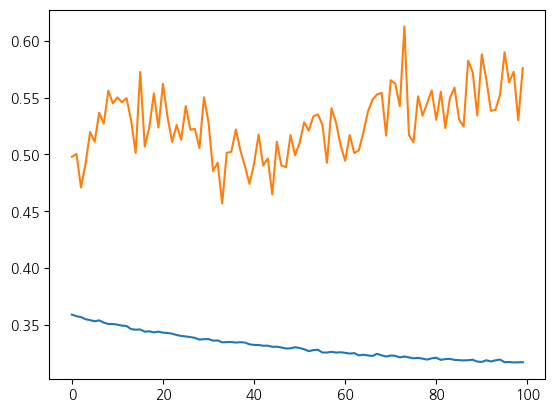

In [99]:
ax = plt.subplots(1, 1)
ax = sns.lineplot(train_loss_list)
ax = sns.lineplot(valid_loss_list)

In [100]:
def csi_score_class(pred, actual):
    matrix = {i:{j:0 for j in range(1, 4+1)}for i in range(1, 4+1)}
    df_matrix = pd.DataFrame(matrix)
    # 길이가 같지 않으면 추론이 제대로 되지 않은 것이므로 에러 발생
    if len(pred) != len(actual):
        raise
    
    # 리스트로 들어온 pred와 actual을 순회하며 해당 class의 개수를 샘
    # 행이 pred, 열이 actual
    for i in range(len(pred)):
        df_matrix[pred[i]][actual[i]] += 1
    
    # H, F, M 배분
    H = df_matrix[1][1] + df_matrix[2][2] + df_matrix[3][3]
    F = sum(df_matrix.iloc[:, :3]) - H
    M = sum(df_matrix.iloc[:3, -1])
    
    return H / (H + F + M), df_matrix, (H, F, M)

In [101]:
epoch_data_list[-1]

,actual,pred
0,4,4
1,4,4
2,4,4
3,4,4
4,4,4
...,...,...
1051195,4,4
1051196,4,4
1051197,4,4
1051198,4,4


In [102]:
score_list = []
for df in tqdm(epoch_data_list):
    score, _, _ = csi_score_class(df.reset_index(drop=True)["pred"], df.reset_index(drop=True)["actual"])
    score_list.append(score)

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
score, csi_df, _ = csi_score_class(epoch_data_list[-1].reset_index(drop=True)["pred"], epoch_data_list[-1].reset_index(drop=True)["actual"])

In [104]:
score

0.0002462144527883787

In [105]:
csi_df

,1,2,3,4
1,22,0,0,1895
2,50,0,1,3161
3,21,0,1,2972
4,174,0,110,1042793


In [42]:
# torch.save(model, "VanillaLSTM.pt")

In [203]:
# # 커널 재실행 시 모델 불러오기
# import torch

# model = torch.load("VanillaLSTM.pt")


In [218]:
# Validation 검증
from tqdm.auto import tqdm

model.eval()
with torch.no_grad():
    valid = []
    valid_label = []
    running_loss = 0.0
    n = len(valid_data_loader)
    valid_iterator = tqdm(enumerate(valid_data_loader), total=n, desc=f"validation")
    for _, batch_data in valid_iterator:
        X, y = batch_data
        y = y.long() - 1
        valid_pred = model(X)
        loss = criterion(valid_pred, y) # output과 y 데이터로 loss 구하기
        valid.append(np.array(valid_pred))
        valid_label.append(torch.argmax(valid_pred, dim=1) + 1)
        running_loss += loss.item() # 한 배치의 loss 더하기 (추후 평균 loss를 구하기 위함)
        train_iterator.set_postfix({
            'valid_loss' : format(loss, 'f')
        })
    valid = np.array(valid).reshape(-1, 4).squeeze()
    valid_label = np.array(valid_label).flatten()
    y_valid = train.query("년도=='K'")["시정구간"].reset_index(drop=True)
    
    valid_df = pd.DataFrame({"actual" : y_valid,
                             "pred" : valid_label})
    
    # loss
    loss_list.append(running_loss / n) # 평균 loss

validation:   0%|          | 0/7300 [00:00<?, ?it/s]

In [225]:
score, csi_df, _ = csi_score_class(valid_df["pred"], valid_df["actual"])

In [226]:
score

0.0

In [227]:
# 행 index가 정답, 열 index가 예측
csi_df

,1,2,3,4
1,0,0,0,1917
2,0,0,0,3212
3,0,0,0,2994
4,0,0,0,1043077


<Axes: ylabel='loss'>

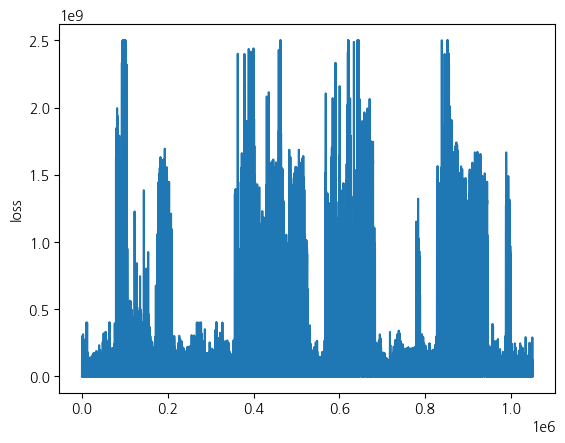

In [56]:
sns.lineplot(valid_df["loss"].astype(float))

In [204]:
# test 셋 forecasting

## window 만큼 imputate로 채우기

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=6)
impute_train = train_df.iloc[:, 1:-1]
imputer.fit(impute_train)

KNNImputer(n_neighbors=6)

In [205]:
target_data = test_df.shift(window_size)[:144]
cols = target_data.columns

In [206]:
pre_test_data = pd.DataFrame(imputer.transform(target_data), columns=cols)[:6]

In [207]:
def is_rain(rain):
    if rain >= 0.5 :
        return 1
    elif rain < 0.5:
        return 0
    else:
        return np.nan

In [208]:
pre_test_data["강수유무"] = pre_test_data["강수유무"].apply(is_rain)

In [209]:
pre_test_data

,10분평균풍향,10분평균풍속,10분평균기온,10분평균상대습도,10분일사량합,10분평균지면온도,강수유무
0,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
1,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
2,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
3,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
4,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
5,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0


In [210]:
test_data = pd.concat([pre_test_data, test_df], axis=0)

In [211]:
test_data

,10분평균풍향,10분평균풍속,10분평균기온,10분평균상대습도,10분일사량합,10분평균지면온도,강수유무
0,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
1,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
2,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
3,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
4,0.515933,0.097242,0.607535,0.668693,0.003802,0.274966,0
...,...,...,...,...,...,...,...
262795,0.941111,0.271111,0.463768,0.713000,0.000000,0.090667,0
262796,0.931111,0.257778,0.465378,0.714000,0.000000,0.090667,0
262797,0.936389,0.235556,0.463768,0.721000,0.000000,0.089333,0
262798,0.894444,0.164444,0.460548,0.725000,0.000000,0.084000,0


In [231]:
test_dataset = CustomDataset(data=test_data, window_size=6, kind='test')
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [232]:
for X in test_data_loader:
    print(X)
    break

tensor([[[0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000]],

        [[0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.9153, 0.0267, 0.3510,  ..., 0.0000, 0.0440, 0.0000]],

        [[0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0972, 0.6075,  ..., 0.0038, 0.2750, 0.0000],
         [0.5159, 0.0

In [233]:
# test forecast
from tqdm.auto import tqdm

model.eval()
with torch.no_grad():
    n = len(test_data_loader)
    test_list = []
    test_iterator = tqdm(enumerate(test_data_loader), total=n, desc=f"Test")
    for _, X in test_iterator:
        test_pred = model(X)
        test_list += np.array(test_pred).flatten().tolist()
    # inverse
    pred_inverse = y_scaler.inverse_transform(np.array(test_list).reshape(-1, 1)).squeeze()
    
    test_pred_df = pd.DataFrame({"pred" : pred_inverse})

Test:   0%|          | 0/1825 [00:00<?, ?it/s]

In [234]:
test_pred_df.isna().sum()

pred    0
dtype: int64

In [235]:
test_pred_df.describe()

,pred
count,262800.000000
mean,15192.797320
std,3712.470791
min,1.000000
25%,13361.749454
50%,15625.940477
75%,18065.948535
max,23079.820463


In [236]:
test_pred_df

,pred
0,16982.521736
1,16289.599942
2,15359.792707
3,14549.874805
4,14054.095399
...,...
262795,17125.795860
262796,17186.622111
262797,17105.705628
262798,17024.614180


In [237]:
test

,년도,월,일,시간,분,지점번호,10분평균풍향,10분평균풍속,10분평균기온,강수유무,10분평균상대습도,10분일사량합,10분평균지면온도,시정구간,ground,alpha,dew_point
0,L,1.0,1.0,0.0,0.0,AI,329.5,0.6,-2.5,0,87.5,0.0,-1.6,4.0,A,-0.317099,-4.285774
1,L,1.0,1.0,0.0,10.0,AI,321.8,1.2,-2.5,0,88.2,0.0,-1.6,4.0,A,-0.309130,-4.179973
2,L,1.0,1.0,0.0,20.0,AI,0.4,0.4,-2.5,0,88.6,0.0,-1.7,4.0,A,-0.304606,-4.119849
3,L,1.0,1.0,0.0,30.0,AI,323.6,0.7,-2.6,0,88.7,0.0,-1.6,4.0,A,-0.310901,-4.203496
4,L,1.0,1.0,0.0,40.0,AI,208.4,0.2,-2.6,0,89.0,0.0,-1.6,4.0,A,-0.307525,-4.158644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262795,L,12.0,31.0,23.0,10.0,ED,338.8,6.1,4.5,0,71.3,0.0,1.9,NaN,E,-0.017403,-0.239285
262796,L,12.0,31.0,23.0,20.0,ED,335.2,5.8,4.6,0,71.4,0.0,1.9,NaN,E,-0.009006,-0.123892
262797,L,12.0,31.0,23.0,30.0,ED,337.1,5.3,4.5,0,72.1,0.0,1.8,NaN,E,-0.006245,-0.085923
262798,L,12.0,31.0,23.0,40.0,ED,322.0,3.7,4.3,0,72.5,0.0,1.4,NaN,E,-0.014720,-0.202430


In [238]:
def make_class(vis):
    if 0 <= vis and vis < 200 :
        return 1
    elif 200 <= vis and vis < 500 :
        return 2
    elif 500 <= vis and vis < 1000 :
        return 3
    elif 1000 <= vis :
        return 4
    else :
        return np.nan

In [239]:
test["시정구간"] = test_pred_df["pred"].apply(make_class)

In [240]:
test[test["시정구간"].isna()]

,년도,월,일,시간,분,지점번호,10분평균풍향,10분평균풍속,10분평균기온,강수유무,10분평균상대습도,10분일사량합,10분평균지면온도,시정구간,ground,alpha,dew_point


In [242]:
test["시정구간"].value_counts()

시정구간
4    260225
1      2222
3       228
2       125
Name: count, dtype: int64

In [243]:
original_test = pd.read_csv(DATA / "fog_test.csv")

In [244]:
original_test
del original_test["Unnamed: 0"]

In [245]:
original_test

,fog_test.year,fog_test.month,fog_test.day,fog_test.time,fog_test.minute,fog_test.stn_id,fog_test.ws10_deg,fog_test.ws10_ms,fog_test.ta,fog_test.re,fog_test.hm,fog_test.sun10,fog_test.ts,fog_test.class
0,L,1,1,0,0,AI,329.5,0.6,-2.5,0.0,87.5,0.0,-1.6,NaN
1,L,1,1,0,10,AI,321.8,1.2,-2.5,0.0,88.2,0.0,-1.6,NaN
2,L,1,1,0,20,AI,0.4,0.4,-2.5,0.0,88.6,0.0,-1.7,NaN
3,L,1,1,0,30,AI,323.6,0.7,-2.6,0.0,88.7,0.0,-1.6,NaN
4,L,1,1,0,40,AI,208.4,0.2,-2.6,0.0,89.0,0.0,-1.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262795,L,12,31,23,10,ED,338.8,6.1,4.5,0.0,71.3,0.0,1.9,NaN
262796,L,12,31,23,20,ED,335.2,5.8,4.6,0.0,71.4,0.0,1.9,NaN
262797,L,12,31,23,30,ED,337.1,5.3,4.5,0.0,72.1,0.0,1.8,NaN
262798,L,12,31,23,40,ED,322.0,3.7,4.3,0.0,72.5,0.0,1.4,NaN


In [250]:
test = test.iloc[:, :-3]

In [251]:
test.columns = original_test.columns

In [252]:
test

,fog_test.year,fog_test.month,fog_test.day,fog_test.time,fog_test.minute,fog_test.stn_id,fog_test.ws10_deg,fog_test.ws10_ms,fog_test.ta,fog_test.re,fog_test.hm,fog_test.sun10,fog_test.ts,fog_test.class
0,L,1.0,1.0,0.0,0.0,AI,329.5,0.6,-2.5,0,87.5,0.0,-1.6,4
1,L,1.0,1.0,0.0,10.0,AI,321.8,1.2,-2.5,0,88.2,0.0,-1.6,4
2,L,1.0,1.0,0.0,20.0,AI,0.4,0.4,-2.5,0,88.6,0.0,-1.7,4
3,L,1.0,1.0,0.0,30.0,AI,323.6,0.7,-2.6,0,88.7,0.0,-1.6,4
4,L,1.0,1.0,0.0,40.0,AI,208.4,0.2,-2.6,0,89.0,0.0,-1.6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262795,L,12.0,31.0,23.0,10.0,ED,338.8,6.1,4.5,0,71.3,0.0,1.9,4
262796,L,12.0,31.0,23.0,20.0,ED,335.2,5.8,4.6,0,71.4,0.0,1.9,4
262797,L,12.0,31.0,23.0,30.0,ED,337.1,5.3,4.5,0,72.1,0.0,1.8,4
262798,L,12.0,31.0,23.0,40.0,ED,322.0,3.7,4.3,0,72.5,0.0,1.4,4


In [253]:
test.to_csv("240253.csv", index=False)